# Getting started

Greedy or topological coloring (or sequential coloring) is a cartographic method of assigning colors to polygons (or other geoemtries, `greedy` supports all geometry types) in such a way, that no two adjacent polygons share the same color.

`greedy` is a small package providing such a functionality on top of GeoPandas GeoDataFrames. `greedy.greedy()` is all we need.

In [1]:
import geopandas as gpd

from greedy import greedy

Few of `greedy`'s methods of coloring require either measuring of areas or distances. To obtain proper values, our GeoDataFrame needs to be in projected CRS. Let's use Africa and reproject it to 'ESRI:102022':

/Users/martin/anaconda3/envs/geo_dev/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


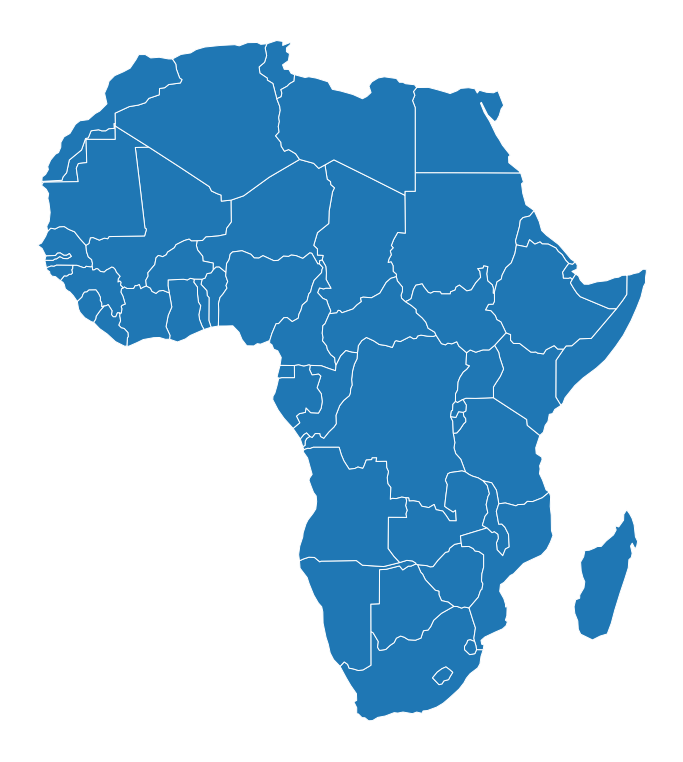

In [72]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world.loc[world.continent == 'Africa']
africa = africa.to_crs('ESRI:102022')
ax = africa.plot(figsize=(12, 16), edgecolor='w')
ax.set_axis_off()

## Default

The default usage of `greedy` is extremely simple. Greedy returns Series with color codes, so we can assign it directly as a new column of our GeoDataFrame:

In [73]:
africa['greedy_default'] = greedy(africa)
africa['greedy_default'].head(5)

1     1
2     0
11    0
12    1
13    4
Name: greedy_default, dtype: int64

Using resulting color codes as plotting categories gives us following plot:

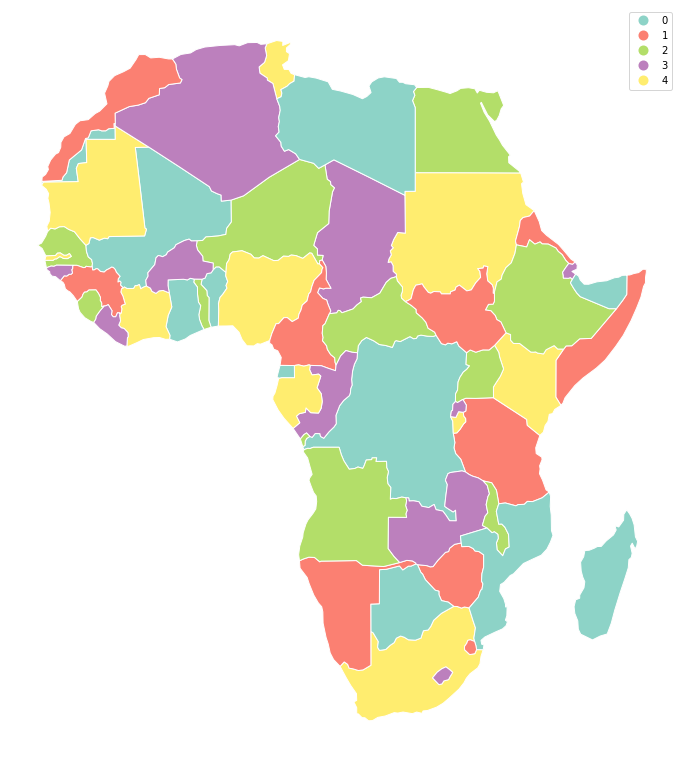

In [74]:
ax = africa.plot('greedy_default', categorical=True, figsize=(12, 16), cmap='Set3', legend=True, edgecolor='w')
ax.set_axis_off()

## Strategies

### Balanced

Greedy offers several strategies of coloring. The default strategy is `balanced` based on `count` attempting to balance the number of features per each color. Other balanced modes are `area` (balance the area covered by each color), `distance` and `centroid` (both attemtps to balance the distance between colors). Each of them attempts to balance the color assignemnt according to different conditions and hence can result in a differnet number of colors.

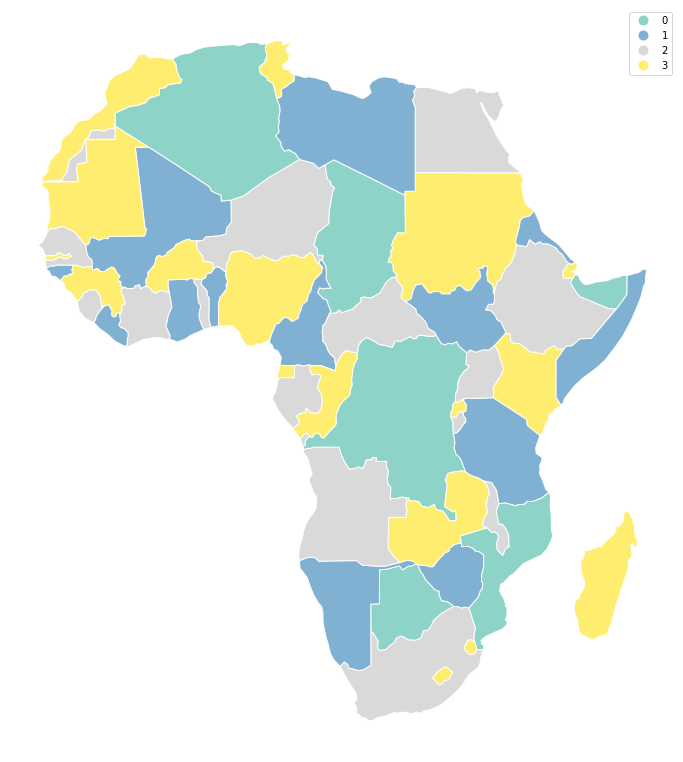

In [76]:
africa['greedy_area'] = greedy(africa, strategy='balanced', balance='area')
ax = africa.plot('greedy_area', categorical=True, figsize=(12, 16), cmap='Set3', legend=True, edgecolor='w')
ax.set_axis_off()

Different modes of balancing within `balanced` strategy can be set using `balance` keyword.

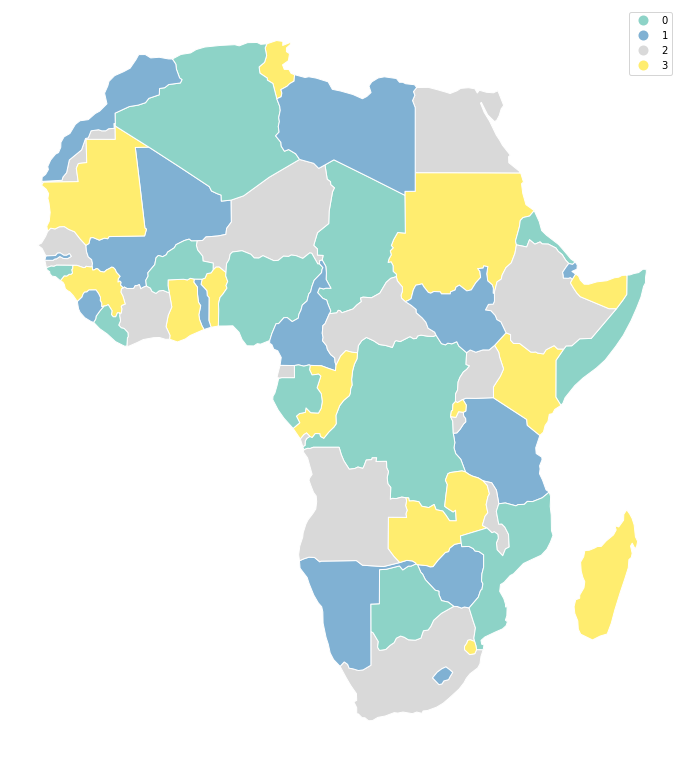

In [77]:
africa['greedy_distance'] = greedy(africa, strategy='balanced', balance='distance')
ax = africa.plot('greedy_distance', categorical=True, figsize=(12, 16), cmap='Set3', legend=True, edgecolor='w')
ax.set_axis_off()

## NetworkX strategies

On top of four modes of balanced coloring strategy, `greedy` offers all `networkx.greedy_coloring()` strategies, like `largest_first`:

In [79]:
africa['greedy_largest_first'] = greedy(africa, strategy='largest_first')

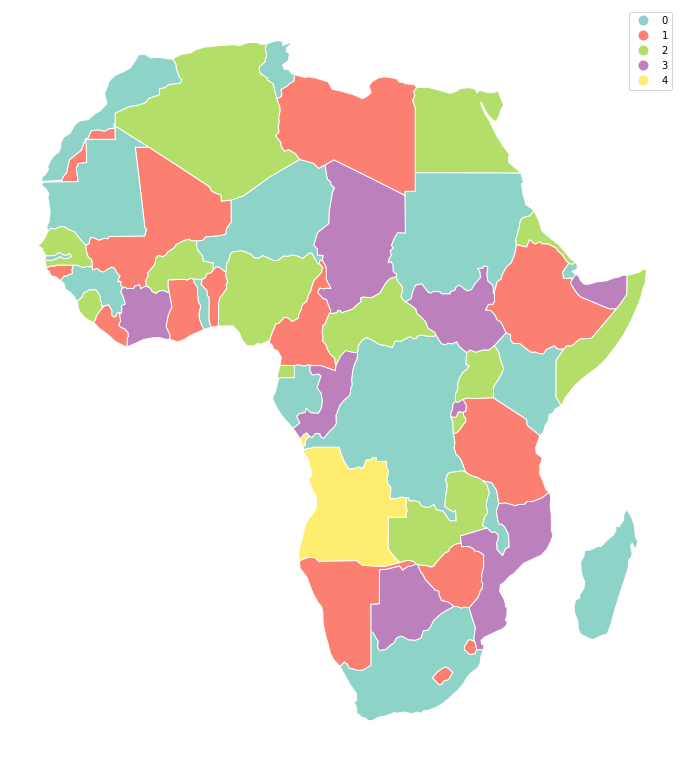

In [80]:
ax = africa.plot('greedy_largest_first', categorical=True, figsize=(12, 16), cmap='Set3', legend=True, edgecolor='w')
ax.set_axis_off()

Another strategy provided by networkX is `smallest_last`. All strategies provide different results. Check Comparison of strategies for details.

In [81]:
africa['greedy_s'] = greedy(africa, strategy='smallest_last')

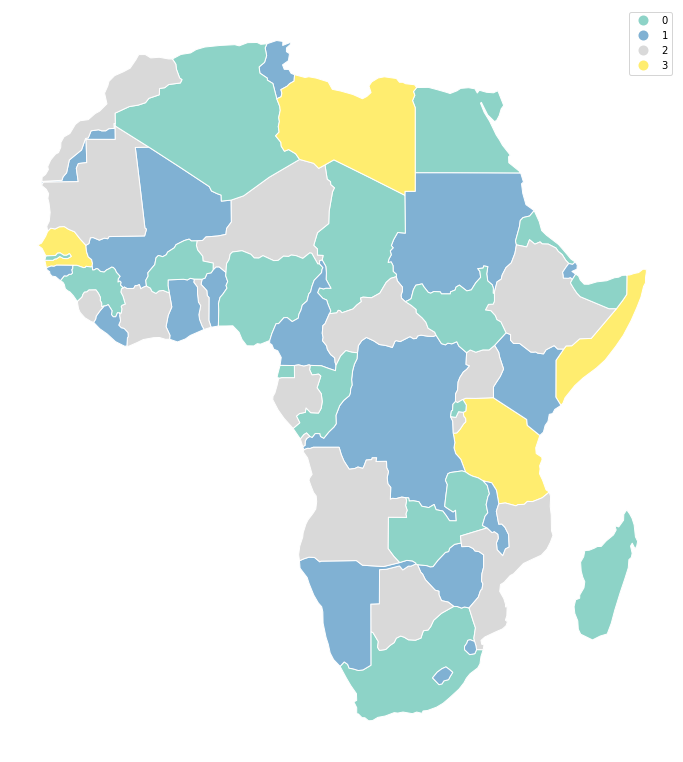

In [82]:
ax = africa.plot('greedy_s', categorical=True, figsize=(12, 16), cmap='Set3', legend=True, edgecolor='w')
ax.set_axis_off()

Greedy is variable in a way how to define adjacency and which coloring strategy to use. All options are described in this documentation together with comparison of their performance.